In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

In [51]:
training = pd.read_csv('../input/training_dataset.csv')
test = pd.read_csv('../input/test_dataset.csv')


In [52]:
training.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,scribe
0,0,-0.091897,0.297600,0.079145,0.196496,0.261718,1.269960,0.446679,-0.751707,0.001721,0.998901,Philippus
1,1,-0.091897,0.226939,0.267634,0.024091,0.261718,-0.806282,0.597681,-0.601277,0.126447,-0.909619,Paithonius
2,2,0.167323,0.313302,0.168055,-0.383198,0.261718,0.190314,0.824183,0.558250,-0.247731,-0.148073,Marcus
3,3,-0.017834,-0.228430,0.370770,1.293671,0.172340,0.896237,0.182426,0.416867,1.373706,0.868284,Noaelius
4,4,0.043885,0.407516,-0.120014,0.281743,0.261718,-0.183409,0.106925,0.142896,0.531806,-0.101311,Marcus


In [53]:
test.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
0,0,-0.042522,0.007106,0.264078,-0.162546,0.172340,-1.055431,0.106925,0.680858,0.781258,-0.901193
1,1,0.315450,0.540986,0.029355,-0.395163,0.261718,-1.055431,0.182426,-0.643408,0.095265,-0.925038
2,2,-0.351118,-0.244132,0.594823,1.592678,0.797987,0.397939,-1.025587,1.157371,1.591976,1.278013
3,3,0.327793,0.336855,-0.020434,1.086893,0.261718,-0.307984,0.220177,0.449873,-0.528364,-0.276773
4,4,0.019197,-0.087108,0.384996,0.794958,0.261718,0.314889,-0.044076,-1.067421,-0.715453,0.440809


In [54]:
training.shape

(12017, 12)

In [55]:
training.dtypes

id          int64
F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8        float64
F9        float64
F10       float64
scribe     object
dtype: object

In [56]:
test.shape

(8012, 11)

In [57]:
training.isnull().sum()

id        0
F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
scribe    0
dtype: int64

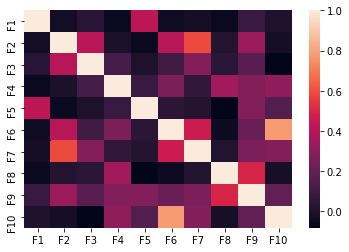

In [58]:
columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10']

corrMatrix = training[columns].corr()
heatmap = sns.heatmap(corrMatrix)

In [59]:
training.drop(['id'], inplace=True, axis=1)

In [60]:
training.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,scribe
0,-0.091897,0.297600,0.079145,0.196496,0.261718,1.269960,0.446679,-0.751707,0.001721,0.998901,Philippus
1,-0.091897,0.226939,0.267634,0.024091,0.261718,-0.806282,0.597681,-0.601277,0.126447,-0.909619,Paithonius
2,0.167323,0.313302,0.168055,-0.383198,0.261718,0.190314,0.824183,0.558250,-0.247731,-0.148073,Marcus
3,-0.017834,-0.228430,0.370770,1.293671,0.172340,0.896237,0.182426,0.416867,1.373706,0.868284,Noaelius
4,0.043885,0.407516,-0.120014,0.281743,0.261718,-0.183409,0.106925,0.142896,0.531806,-0.101311,Marcus


In [70]:
training.scribe.unique()

array(['Philippus', 'Paithonius', 'Marcus', 'Noaelius', 'Begonius',
       'Franciscus', 'Ubuntius', 'FerrumEffractarius'], dtype=object)

In [76]:
training_dummy = pd.get_dummies(training, drop_first=True)

In [78]:
training_dummy.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,scribe_FerrumEffractarius,scribe_Franciscus,scribe_Marcus,scribe_Noaelius,scribe_Paithonius,scribe_Philippus,scribe_Ubuntius
0,-0.091897,0.297600,0.079145,0.196496,0.261718,1.269960,0.446679,-0.751707,0.001721,0.998901,0,0,0,0,0,1,0
1,-0.091897,0.226939,0.267634,0.024091,0.261718,-0.806282,0.597681,-0.601277,0.126447,-0.909619,0,0,0,0,1,0,0
2,0.167323,0.313302,0.168055,-0.383198,0.261718,0.190314,0.824183,0.558250,-0.247731,-0.148073,0,0,1,0,0,0,0
3,-0.017834,-0.228430,0.370770,1.293671,0.172340,0.896237,0.182426,0.416867,1.373706,0.868284,0,0,0,1,0,0,0
4,0.043885,0.407516,-0.120014,0.281743,0.261718,-0.183409,0.106925,0.142896,0.531806,-0.101311,0,0,1,0,0,0,0


In [80]:
training_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12017 entries, 0 to 12016
Data columns (total 17 columns):
F1                           12017 non-null float64
F2                           12017 non-null float64
F3                           12017 non-null float64
F4                           12017 non-null float64
F5                           12017 non-null float64
F6                           12017 non-null float64
F7                           12017 non-null float64
F8                           12017 non-null float64
F9                           12017 non-null float64
F10                          12017 non-null float64
scribe_FerrumEffractarius    12017 non-null uint8
scribe_Franciscus            12017 non-null uint8
scribe_Marcus                12017 non-null uint8
scribe_Noaelius              12017 non-null uint8
scribe_Paithonius            12017 non-null uint8
scribe_Philippus             12017 non-null uint8
scribe_Ubuntius              12017 non-null uint8
dtypes: float64(10), 

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, svm, metrics
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [71]:

X = training["scribe"]
y = training[columns]


In [72]:
avila_model = LinearRegression()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [75]:
reg = avila_model.fit(X_train, y_train)


ValueError: could not convert string to float: 'Philippus'